In [1]:
# Data Set : Electricity Consumption.csv

'''This model is to predict future electricity consumption.'''

'This model is to predict future electricity consumption.'

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Deep Learning with Prajwal'

In [4]:
# Read Data - Normal Way

# This is one year data (365 days * 24 hours)

os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day41\\')

In [5]:
df=pd.read_csv('Electricity Consumption.csv')
display(df)

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


In [6]:
# Drop Missing values (No Missing values in current data)

df.dropna(inplace=True)
display(df.shape)

(8760, 4)

In [7]:
df.dtypes

DATE            object
Humidity         int64
Temperature    float64
Electricity      int64
dtype: object

In [8]:
df

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


In [9]:
df.drop(["DATE"],axis=1)

,Humidity,Temperature,Electricity
0,92,-1.1,914
1,92,-1.5,887
2,91,-1.5,865
3,88,-1.1,852
4,87,-1.3,852
...,...,...,...
8755,95,-1.2,1180
8756,93,0.8,1133
8757,94,1.9,1073
8758,93,2.2,994


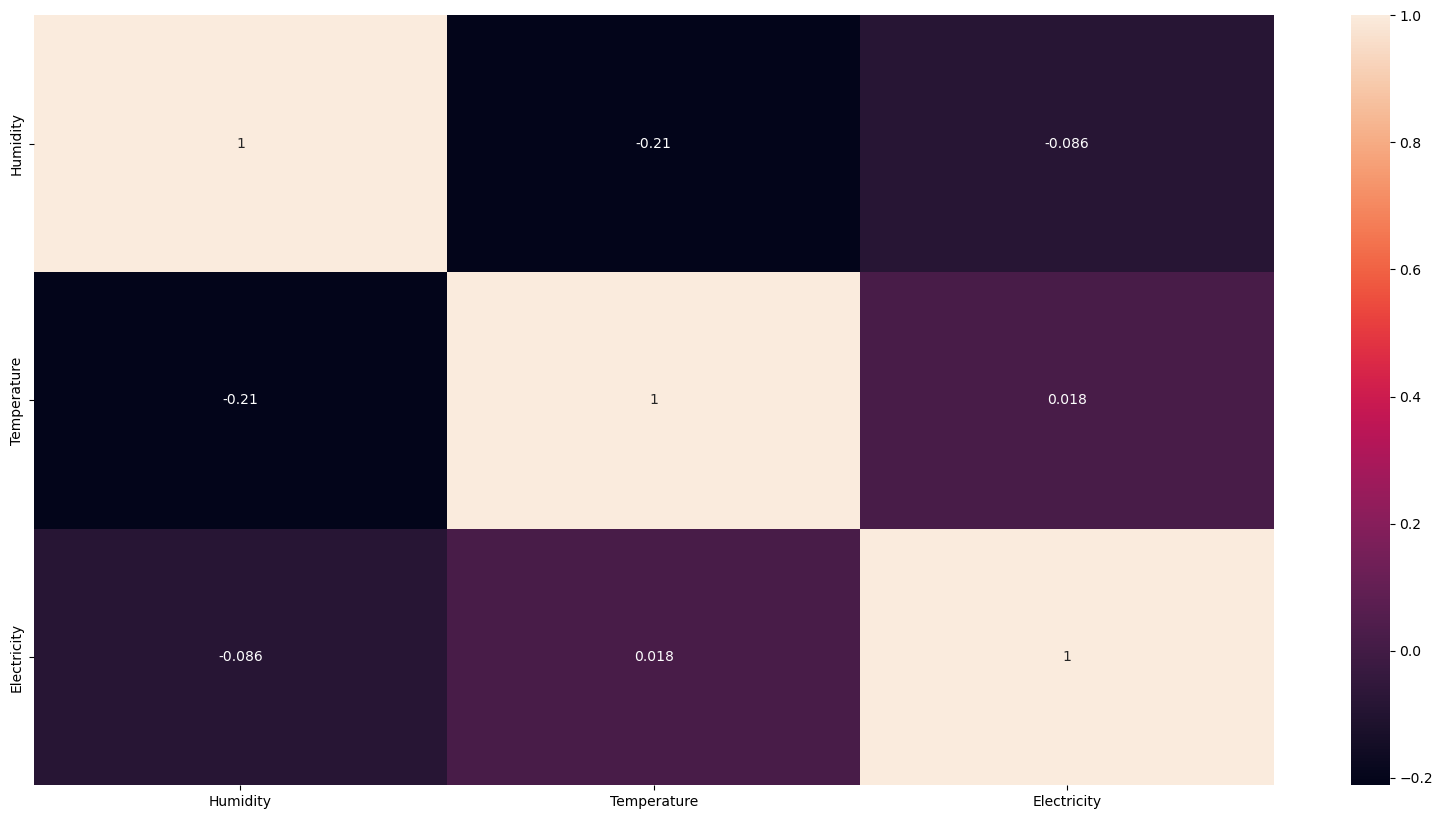

In [10]:
# Create a heat map to check Co relation between variables

import seaborn as sn
sn.heatmap(df.drop(["DATE"],axis=1).corr(),annot=True)
plt.show()

In [11]:
df

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


In [12]:
# Train Test Split
training_set=df.iloc[:8712,1:4].values
display(training_set.shape)
test_set=df.iloc[8712:,1:4].values
display(test_set.shape)

(8712, 3)

(48, 3)

In [13]:
training_set

array([[  92. ,   -1.1,  914. ],
       [  92. ,   -1.5,  887. ],
       [  91. ,   -1.5,  865. ],
       ...,
       [  82. ,   -2.4, 1086. ],
       [  82. ,   -3.1, 1034. ],
       [  73. ,   -5. ,  979. ]])

In [14]:
test_set

array([[ 7.700e+01, -6.400e+00,  9.410e+02],
       [ 8.100e+01, -7.400e+00,  9.230e+02],
       [ 8.000e+01, -8.600e+00,  9.130e+02],
       [ 7.900e+01, -9.100e+00,  9.050e+02],
       [ 7.900e+01, -9.500e+00,  9.230e+02],
       [ 8.000e+01, -1.000e+01,  9.640e+02],
       [ 7.800e+01, -1.060e+01,  1.038e+03],
       [ 7.800e+01, -1.140e+01,  1.096e+03],
       [ 7.800e+01, -1.180e+01,  1.111e+03],
       [ 7.700e+01, -1.120e+01,  1.094e+03],
       [ 7.300e+01, -1.040e+01,  1.049e+03],
       [ 7.000e+01, -9.500e+00,  1.082e+03],
       [ 6.300e+01, -8.600e+00,  1.077e+03],
       [ 5.800e+01, -7.700e+00,  1.070e+03],
       [ 5.500e+01, -7.500e+00,  1.085e+03],
       [ 4.800e+01, -6.900e+00,  1.148e+03],
       [ 5.000e+01, -7.300e+00,  1.241e+03],
       [ 5.800e+01, -8.700e+00,  1.335e+03],
       [ 6.100e+01, -8.700e+00,  1.296e+03],
       [ 6.900e+01, -1.000e+01,  1.269e+03],
       [ 6.900e+01, -9.900e+00,  1.232e+03],
       [ 7.300e+01, -8.900e+00,  1.171e+03],
       [ 7

In [15]:
# Min Max Scaler

"(Mandatory to scale the data)"

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set) # Training Set
test_set_scaled=sc.fit_transform(test_set) # Test Set


In [16]:
training_set_scaled

array([[0.91011236, 0.4       , 0.27878788],
       [0.91011236, 0.3936    , 0.25541126],
       [0.8988764 , 0.3936    , 0.23636364],
       ...,
       [0.79775281, 0.3792    , 0.42770563],
       [0.79775281, 0.368     , 0.38268398],
       [0.69662921, 0.3376    , 0.33506494]])

In [17]:
test_set_scaled

array([[0.61702128, 0.375     , 0.08372093],
       [0.70212766, 0.30555556, 0.04186047],
       [0.68085106, 0.22222222, 0.01860465],
       [0.65957447, 0.1875    , 0.        ],
       [0.65957447, 0.15972222, 0.04186047],
       [0.68085106, 0.125     , 0.1372093 ],
       [0.63829787, 0.08333333, 0.30930233],
       [0.63829787, 0.02777778, 0.44418605],
       [0.63829787, 0.        , 0.47906977],
       [0.61702128, 0.04166667, 0.43953488],
       [0.53191489, 0.09722222, 0.33488372],
       [0.46808511, 0.15972222, 0.41162791],
       [0.31914894, 0.22222222, 0.4       ],
       [0.21276596, 0.28472222, 0.38372093],
       [0.14893617, 0.29861111, 0.41860465],
       [0.        , 0.34027778, 0.56511628],
       [0.04255319, 0.3125    , 0.78139535],
       [0.21276596, 0.21527778, 1.        ],
       [0.27659574, 0.21527778, 0.90930233],
       [0.44680851, 0.125     , 0.84651163],
       [0.44680851, 0.13194444, 0.76046512],
       [0.53191489, 0.20138889, 0.61860465],
       [0.

In [18]:
# from the test set remove the lst column

'This is the predictor (dependent variable)'

test_set_scaled=test_set_scaled[:,0:2]
display(test_set_scaled)

array([[0.61702128, 0.375     ],
       [0.70212766, 0.30555556],
       [0.68085106, 0.22222222],
       [0.65957447, 0.1875    ],
       [0.65957447, 0.15972222],
       [0.68085106, 0.125     ],
       [0.63829787, 0.08333333],
       [0.63829787, 0.02777778],
       [0.63829787, 0.        ],
       [0.61702128, 0.04166667],
       [0.53191489, 0.09722222],
       [0.46808511, 0.15972222],
       [0.31914894, 0.22222222],
       [0.21276596, 0.28472222],
       [0.14893617, 0.29861111],
       [0.        , 0.34027778],
       [0.04255319, 0.3125    ],
       [0.21276596, 0.21527778],
       [0.27659574, 0.21527778],
       [0.44680851, 0.125     ],
       [0.44680851, 0.13194444],
       [0.53191489, 0.20138889],
       [0.57446809, 0.19444444],
       [0.5106383 , 0.22222222],
       [0.55319149, 0.22916667],
       [0.59574468, 0.20833333],
       [0.59574468, 0.22916667],
       [0.63829787, 0.22916667],
       [0.70212766, 0.23611111],
       [0.72340426, 0.24305556],
       [0.

In [19]:
# Intialize

x_train=[]
y_train=[]
WS=24 # Window size ie one cycle, one day has 24 records

' Prepare the data to  create model. This is same as that of single variable prediction '
'Prepare previous 24 hours data to use the prediction'

for i in range(WS, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-WS:i,0:3])
    y_train.append(training_set_scaled[i,2]) 

In [20]:
# Convert X_train list to array

x_train=np.array(x_train)
display(x_train.shape)

(8688, 24, 3)

In [21]:
8712-24
'8688= Training data set records - 24(first 24 records not considering for prediction)'
''' 8688 - Number of record in training set
    24 - Number of previous periods for prediction
    3 - There are three variables for prediction'''

' 8688 - Number of record in training set\n    24 - Number of previous periods for prediction\n    3 - There are three variables for prediction'

In [22]:
x_train

array([[[0.91011236, 0.4       , 0.27878788],
        [0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        ...,
        [0.88764045, 0.408     , 0.39047619],
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169]],

       [[0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        ...,
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485]],

       [[0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        [0.85393258, 0.3968    , 0.22510823],
        ...,
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485],
        [0.79775281, 0.3856    , 0.22510823]],

       ...,

       [[0.71910112, 0.3408    , 0.41125541],
        [0.74157303, 0.3472    , 0.35930736],
        [0.75280899, 0

In [23]:
y_train

[0.24848484848484853,
 0.22510822510822515,
 0.21385281385281385,
 0.21125541125541125,
 0.22683982683982684,
 0.2640692640692641,
 0.33766233766233766,
 0.3939393939393939,
 0.4207792207792208,
 0.4346320346320346,
 0.4363636363636364,
 0.4380952380952381,
 0.4268398268398269,
 0.4103896103896104,
 0.4173160173160173,
 0.4424242424242424,
 0.49696969696969695,
 0.5515151515151516,
 0.5246753246753247,
 0.49956709956709966,
 0.46839826839826837,
 0.4467532467532468,
 0.37748917748917754,
 0.3030303030303031,
 0.2536796536796537,
 0.22077922077922074,
 0.21818181818181814,
 0.20952380952380956,
 0.20952380952380956,
 0.2528138528138528,
 0.3030303030303031,
 0.36363636363636365,
 0.4138528138528139,
 0.4095238095238095,
 0.4077922077922078,
 0.4190476190476191,
 0.4294372294372294,
 0.4268398268398269,
 0.4329004329004329,
 0.4415584415584416,
 0.48658008658008656,
 0.5160173160173159,
 0.503030303030303,
 0.47965367965367967,
 0.4424242424242424,
 0.3991341991341991,
 0.354112554112554

In [24]:
# Convert y_train to list

y_train=np.array(y_train)
display(y_train.shape)

(8688,)

In [25]:
# Create Model

# Import Libraries

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
# Create Model

Model=Sequential()

# Model with 70 layers
# Return_sequences share values to next layer
# x_train.shape[1],3 Input shape, how to identify one records

Model.add(LSTM(units=70,return_sequences=True,input_shape=(x_train.shape[1],3)))

# Drop out to reduce the over fitting remove few neurons

Model.add(Dropout(0.2)) 

In [27]:
# Create second layers 

Model.add(LSTM(units=70,return_sequences=True))
Model.add(Dropout(0.2))

In [28]:
# Create third layers 

Model.add(LSTM(units=70,return_sequences=True))
Model.add(Dropout(0.2))

In [29]:
# Create Last layers (No need specify return_sequences)

Model.add(LSTM(units=70))
Model.add(Dropout(0.2))

In [30]:
# Output layer

Model.add(Dense(units=1))

In [31]:
# Compile the model - Adam optimizer

Model.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
# Model Fitting
'''(Better to give epochs=10)'''

Model.fit(x_train,y_train,epochs=80,batch_size=32)

Epoch 1/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.0204
Epoch 2/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0064
Epoch 3/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0056
Epoch 4/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0051
Epoch 5/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0046
Epoch 6/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0041
Epoch 7/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0032
Epoch 8/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0023
Epoch 9/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0020
Epoch 10/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0016
Epoch 11/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0015
Epoch 12/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0014
Epoch 13/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0014
Epoch 14/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0012
Epoch 15/80
272/272 ━━━━━━━━━━━━━━

In [33]:
# Prediction

# Initialize

prediction_test=[]
# Batch one is last 24 hours data
Batch_one=training_set_scaled[-24:] 

In [34]:
training_set_scaled

array([[0.91011236, 0.4       , 0.27878788],
       [0.91011236, 0.3936    , 0.25541126],
       [0.8988764 , 0.3936    , 0.23636364],
       ...,
       [0.79775281, 0.3792    , 0.42770563],
       [0.79775281, 0.368     , 0.38268398],
       [0.69662921, 0.3376    , 0.33506494]])

In [35]:
training_set_scaled[-24:]

array([[0.76404494, 0.3584    , 0.26493506],
       [0.76404494, 0.36      , 0.23549784],
       [0.7752809 , 0.3568    , 0.21991342],
       [0.76404494, 0.3584    , 0.21471861],
       [0.78651685, 0.36      , 0.22164502],
       [0.78651685, 0.3648    , 0.24502165],
       [0.76404494, 0.3792    , 0.29090909],
       [0.93258427, 0.3744    , 0.34545455],
       [0.93258427, 0.3888    , 0.37229437],
       [0.91011236, 0.4224    , 0.4008658 ],
       [0.91011236, 0.4304    , 0.42424242],
       [0.92134831, 0.4384    , 0.45194805],
       [0.91011236, 0.4544    , 0.44415584],
       [0.91011236, 0.472     , 0.44502165],
       [0.78651685, 0.4768    , 0.46753247],
       [0.7752809 , 0.4704    , 0.45194805],
       [0.88764045, 0.4336    , 0.53333333],
       [0.73033708, 0.4192    , 0.60519481],
       [0.70786517, 0.4096    , 0.55930736],
       [0.73033708, 0.3968    , 0.51601732],
       [0.7752809 , 0.3872    , 0.48311688],
       [0.79775281, 0.3792    , 0.42770563],
       [0.

In [36]:
# Prediction with three input variables
# Reshape Batch one,Three input features

Batch_New=Batch_one.reshape((1,24,3))
display(Batch_New)

array([[[0.76404494, 0.3584    , 0.26493506],
        [0.76404494, 0.36      , 0.23549784],
        [0.7752809 , 0.3568    , 0.21991342],
        [0.76404494, 0.3584    , 0.21471861],
        [0.78651685, 0.36      , 0.22164502],
        [0.78651685, 0.3648    , 0.24502165],
        [0.76404494, 0.3792    , 0.29090909],
        [0.93258427, 0.3744    , 0.34545455],
        [0.93258427, 0.3888    , 0.37229437],
        [0.91011236, 0.4224    , 0.4008658 ],
        [0.91011236, 0.4304    , 0.42424242],
        [0.92134831, 0.4384    , 0.45194805],
        [0.91011236, 0.4544    , 0.44415584],
        [0.91011236, 0.472     , 0.44502165],
        [0.78651685, 0.4768    , 0.46753247],
        [0.7752809 , 0.4704    , 0.45194805],
        [0.88764045, 0.4336    , 0.53333333],
        [0.73033708, 0.4192    , 0.60519481],
        [0.70786517, 0.4096    , 0.55930736],
        [0.73033708, 0.3968    , 0.51601732],
        [0.7752809 , 0.3872    , 0.48311688],
        [0.79775281, 0.3792    , 0

In [37]:
for i in range(48):
    
    # First Prediction is based on last 24 periods 
    First_pred = Model.predict(Batch_New)[0]
    
    prediction_test.append(First_pred)
    
    # This will have independent variable test set ie Humidity and Temperature
    New_var = test_set_scaled[i,:]
    
    # Reshape independent variable
    New_var = New_var.reshape(1,2)
    
    # Add previous prediction to test data 

    New_test = np.insert(New_var, 2, [First_pred], axis =1)
    
    New_test = New_test.reshape(1,1,3)
    
    Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━

In [38]:
# Prdictio Values - This displayed as scaled values

prediction_test=np.array(prediction_test)
display(prediction_test) 

array([[0.28534976],
       [0.25308934],
       [0.23904067],
       [0.23978737],
       [0.25448084],
       [0.29512438],
       [0.37357813],
       [0.45170936],
       [0.47923326],
       [0.46940333],
       [0.45095658],
       [0.44263947],
       [0.44568717],
       [0.4570939 ],
       [0.4732346 ],
       [0.5055521 ],
       [0.5948453 ],
       [0.6946731 ],
       [0.6702548 ],
       [0.6246056 ],
       [0.58345795],
       [0.5240119 ],
       [0.44878232],
       [0.38449395],
       [0.33947325],
       [0.3113568 ],
       [0.29371524],
       [0.2822991 ],
       [0.2831522 ],
       [0.30526537],
       [0.3556371 ],
       [0.41369218],
       [0.44937587],
       [0.46767795],
       [0.47494748],
       [0.4778377 ],
       [0.47525144],
       [0.46505845],
       [0.45652446],
       [0.4677419 ],
       [0.50188774],
       [0.51390713],
       [0.48256627],
       [0.44247675],
       [0.40121627],
       [0.35099646],
       [0.297573  ],
       [0.250

In [39]:
# Display the prediction in Original Format

SI=MinMaxScaler(feature_range=(0,1))
# Apply min-max scaler to last columns ie dependent varibale
y_scale=training_set[:,2:3]
SI.fit_transform(y_scale)

array([[0.27878788],
       [0.25541126],
       [0.23636364],
       ...,
       [0.42770563],
       [0.38268398],
       [0.33506494]])

In [40]:
# Display the prediction in original format,use inverse transform

predictions=SI.inverse_transform(prediction_test)
display(predictions)

array([[ 921.579  ],
       [ 884.31824],
       [ 868.092  ],
       [ 868.95447],
       [ 885.92535],
       [ 932.8687 ],
       [1023.4827 ],
       [1113.7244 ],
       [1145.5144 ],
       [1134.1609 ],
       [1112.8549 ],
       [1103.2485 ],
       [1106.7687 ],
       [1119.9435 ],
       [1138.5859 ],
       [1175.9127 ],
       [1279.0464 ],
       [1394.3474 ],
       [1366.1444 ],
       [1313.4194 ],
       [1265.894  ],
       [1197.2338 ],
       [1110.3436 ],
       [1036.0905 ],
       [ 984.0916 ],
       [ 951.6171 ],
       [ 931.2411 ],
       [ 918.0555 ],
       [ 919.04083],
       [ 944.5815 ],
       [1002.76086],
       [1069.8145 ],
       [1111.0292 ],
       [1132.168  ],
       [1140.5643 ],
       [1143.9026 ],
       [1140.9154 ],
       [1129.1425 ],
       [1119.2858 ],
       [1132.242  ],
       [1171.6803 ],
       [1185.5627 ],
       [1149.364  ],
       [1103.0607 ],
       [1055.4048 ],
       [ 997.40094],
       [ 935.69684],
       [ 881.

In [41]:
# Display the test values (Dependent varibale)

real_values=test_set[:,2]
display(real_values)

array([ 941.,  923.,  913.,  905.,  923.,  964., 1038., 1096., 1111.,
       1094., 1049., 1082., 1077., 1070., 1085., 1148., 1241., 1335.,
       1296., 1269., 1232., 1171., 1114., 1020.,  987.,  952.,  931.,
        911.,  940.,  974., 1049., 1096., 1116., 1144., 1177., 1223.,
       1221., 1203., 1207., 1226., 1279., 1305., 1242., 1180., 1133.,
       1073.,  994.,  919.])

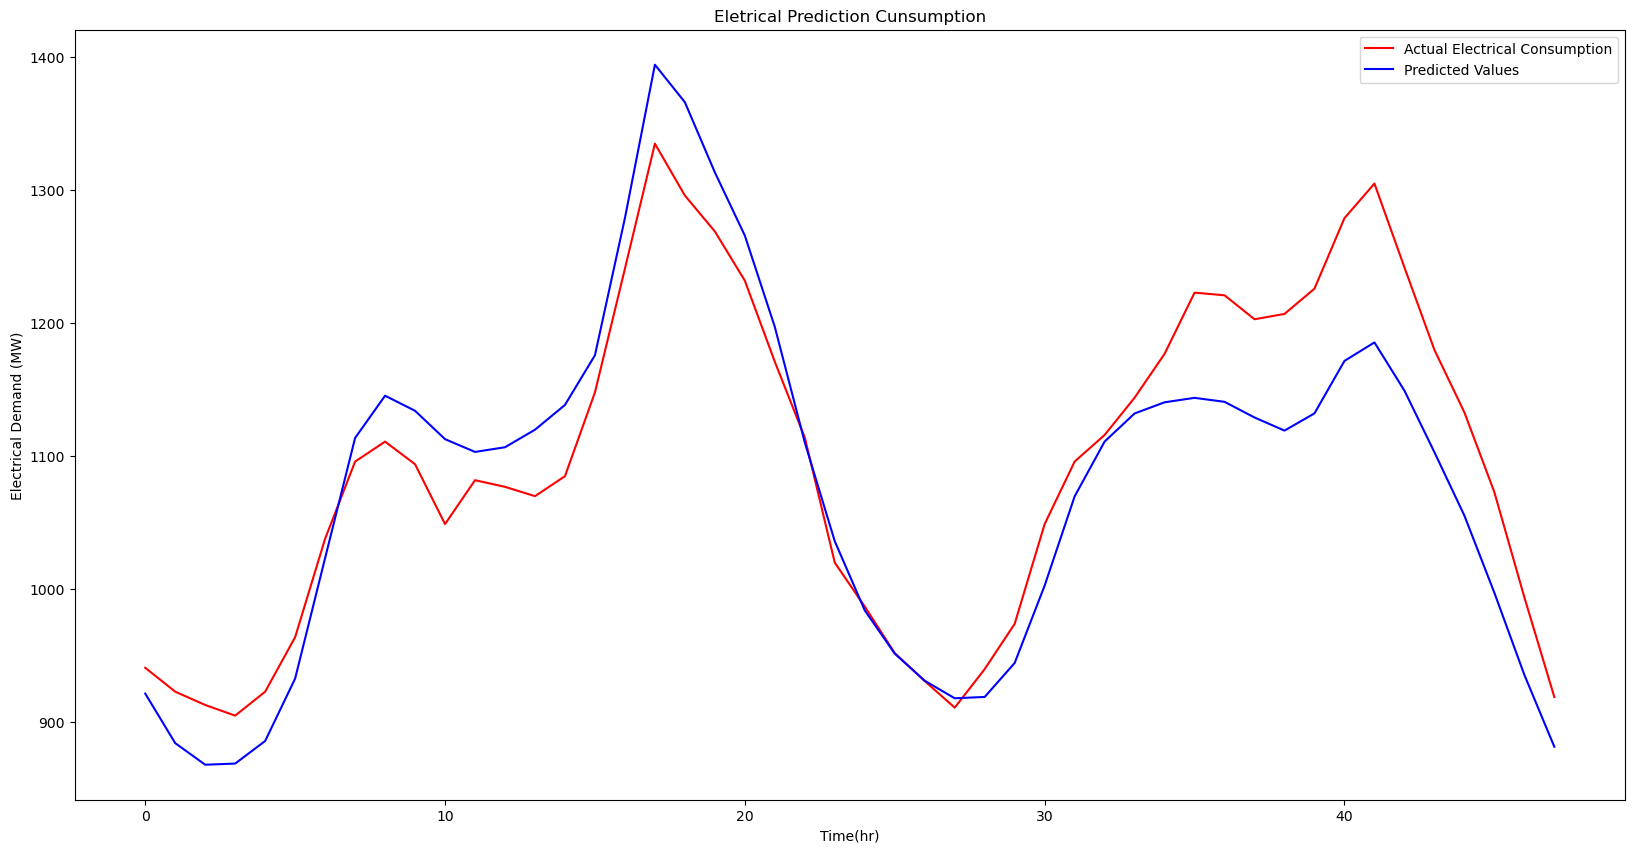

In [42]:
# Plot the graph 
plt.plot(real_values,color='red',label='Actual Electrical Consumption')
plt.plot(predictions,color='blue',label='Predicted Values')
plt.title('Eletrical Prediction Cunsumption')
plt.xlabel('Time(hr)')
plt.ylabel('Electrical Demand (MW)')
plt.legend()
plt.show()

In [43]:
# RMSE

import math
from sklearn.metrics import mean_squared_error
RMSE=math.sqrt(mean_squared_error(real_values,predictions))

display(RMSE)

52.73783729542801

In [44]:
# Display MAPE

def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
MAPE=mean_absolute_percentage_error(real_values,predictions)
display(MAPE)

13.33794111834106

In [45]:
# Display Accuracy

from sklearn.metrics import r2_score
accuracy=r2_score(real_values,predictions)
display(accuracy)

0.8160563605630229